In [1]:
!pip install fredapi

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred
fred_key = 'enter_your_fred_key_here'

In [4]:
fred = Fred(api_key=fred_key)

In [5]:
fred

In [6]:
#Search for economic data
sp_search = fred.search('S&P', order_by='popularity')

In [7]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2022-12-20   2022-12-20   
CSUSHPINSA              CSUSHPINSA     2022-12-20   2022-12-20   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2022-12-20   2022-12-20   
SP500                        SP500     2022-12-20   2022-12-20   
MEHOINUSA672N        MEHOINUSA672N     2022-12-20   2022-12-20   
...                            ...            ...          ...   
A054GBUSA406NNBR  A054GBUSA406NNBR     2022-12-20   2022-12-20   
RKNANPIEA666NRUG  RKNANPIEA666NRUG     2022-12-20   2022-12-20   
CRDQCNBPABIS          CRDQCNBPABIS     2022-12-20   2022-12-20   
DDDI08SGA156NWDB  DDDI08SGA156NWDB     2022-12-20   2022-12-20   
M1204AUSM516SNBR  M1204AUSM516SNBR     2022-12-20   2022-12-20   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
SP500                                                       S&P 500   
MEHOINUSA672N     Real Median Household Income in the United States   
...                                                             ...   
A054GBUSA406NNBR  Change in Business Inventories, Total, in Curr...   
RKNANPIEA666NRUG  Capital Stock at Constant National Prices for ...   
CRDQCNBPABIS      Credit to Private Non-Financial Sector by Dome...   
DDDI08SGA156NWDB     Financial System Deposits to GDP for Singapore   
M1204AUSM516SNBR  Index of Industrial Production and Trade for U...   

                 observation_start observation_end                  frequency  \
series id                                                                       
BAMLH0A0HYM2            1996-12-31      2022-12-19               Daily, Close   
CSUSHPINSA              1987-01-01      2022-09-01                    Monthly   
BAMLH0A0HYM2EY          1996-12-31      2022-12-19               Daily, Close   
SP500                   2012-12-20      2022-12-19               Daily, Close   
MEHOINUSA672N           1984-01-01      2021-01-01                     Annual   
...                            ...             ...                        ...   
A054GBUSA406NNBR        1929-01-01      1958-01-01                     Annual   
RKNANPIEA666NRUG        1950-01-01      2019-01-01                     Annual   
CRDQCNBPABIS            1985-10-01      2022-04-01  Quarterly, End of Quarter   
DDDI08SGA156NWDB        1963-01-01      2020-01-01                     Annual   
M1204AUSM516SNBR        1875-01-01      1915-12-01                    Monthly   

                 frequency_short                               units  \
series id                                                              
BAMLH0A0HYM2                   D                             Percent   
CSUSHPINSA                     M                  Index Jan 2000=100   
BAMLH0A0HYM2EY                 D                             Percent   
SP500                          D                               Index   
MEHOINUSA672N                  A      2021 CPI-U-RS Adjusted Dollars   
...                          ...                                 ...   
A054GBUSA406NNBR               A                 Millions of Dollars   
RKNANPIEA666NRUG               A       Millions of 2017 U.S. Dollars   
CRDQCNBPABIS                   Q  Billions of Chinese Renminbi Yuans   
DDDI08SGA156NWDB               A                             Percent   
M1204AUSM516SNBR               M                    Percent of Trend   

                                     units_short      seasonal_adjustment  \
series id                                                                   
BAMLH0A0HYM2                                   %  Not Seasonally Adjusted   
CSUSHPINSA                 

<AxesSubplot:title={'center':'S&P500'}>

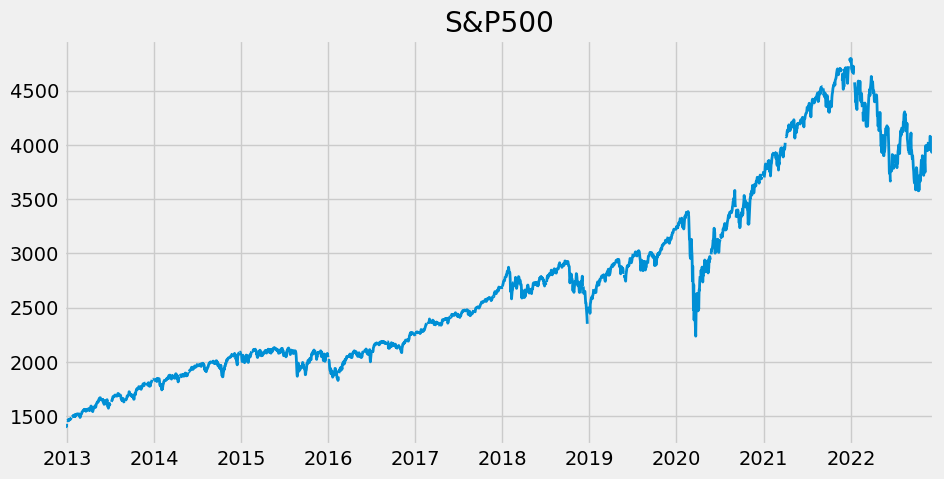

In [8]:
#Pull Raw Data
sp500 = fred.get_series(series_id='SP500')

sp500.plot(figsize=(10,5),title='S&P500', lw=2)

In [9]:
#Pull other datasets, merge them and see their interactions
fred.search('unemployment')

id realtime_start realtime_end  \
series id                                                      
UNRATE                    UNRATE     2022-12-20   2022-12-20   
UNRATENSA              UNRATENSA     2022-12-20   2022-12-20   
NROU                        NROU     2022-12-20   2022-12-20   
UNEMPLOY                UNEMPLOY     2022-12-20   2022-12-20   
CCSA                        CCSA     2022-12-20   2022-12-20   
...                          ...            ...          ...   
LRHUTTTTKRM156S  LRHUTTTTKRM156S     2022-12-20   2022-12-20   
LNS13023622          LNS13023622     2022-12-20   2022-12-20   
LRHUTTTTPTM156S  LRHUTTTTPTM156S     2022-12-20   2022-12-20   
LRUN64TTPTQ156S  LRUN64TTPTQ156S     2022-12-20   2022-12-20   
CSOUUR                    CSOUUR     2022-12-20   2022-12-20   

                                                             title  \
series id                                                            
UNRATE                                           Unemployment Rate   
UNRATENSA                                        Unemployment Rate   
NROU                              Noncyclical Rate of Unemployment   
UNEMPLOY                                        Unemployment Level   
CCSA                       Continued Claims (Insured Unemployment)   
...                                                            ...   
LRHUTTTTKRM156S  Harmonized Unemployment Rate: Total: All Perso...   
LNS13023622            Job Losers as a Percent of Total Unemployed   
LRHUTTTTPTM156S  Harmonized Unemployment Rate: Total: All Perso...   
LRUN64TTPTQ156S  Unemployment Rate: Aged 15-64: All Persons for...   
CSOUUR                    Unemployment Rate in South Census Region   

                observation_start observation_end                frequency  \
series id                                                                    
UNRATE                 1948-01-01      2022-11-01                  Monthly   
UNRATENSA              1948-01-01      2022-11-01                  Monthly   
NROU                   1949-01-01      2032-10-01                Quarterly   
UNEMPLOY               1948-01-01      2022-11-01                  Monthly   
CCSA                   1967-01-07      2022-12-03  Weekly, Ending Saturday   
...                           ...             ...                      ...   
LRHUTTTTKRM156S        1990-01-01      2022-09-01                  Monthly   
LNS13023622            1967-01-01      2022-11-01                  Monthly   
LRHUTTTTPTM156S        1983-01-01      2022-09-01                  Monthly   
LRUN64TTPTQ156S        1998-01-01      2022-04-01                Quarterly   
CSOUUR                 1976-01-01      2022-11-01                  Monthly   

                frequency_short                 units        units_short  \
series id                                                                  
UNRATE                        M               Percent                  %   
UNRATENSA                     M               Percent                  %   
NROU                          Q               Percent                  %   
UNEMPLOY                      M  Thousands of Persons  Thous. of Persons   
CCSA                          W                Number             Number   
...                         ...                   ...                ...   
LRHUTTTTKRM156S               M               Percent                  %   
LNS13023622                   M               Percent                  %   
LRHUTTTTPTM156S               M               Percent                  %   
LRUN64TTPTQ156S               Q               Percent                  %   
CSOUUR                        M               Percent                  %   

                     seasonal_adjustment seasonal_adjustment_short  \
series id                                                            
UNRATE               Seasonally Adjusted                        SA   
UNRATENSA        Not Seasonally Adjusted                       NSA   
NR

<AxesSubplot:title={'center':'Unemployment'}>

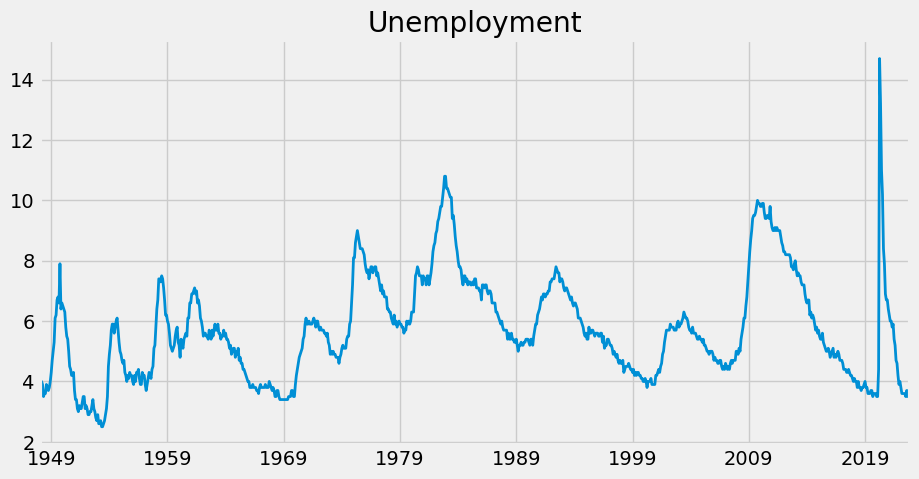

In [12]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize=(10,5),title='Unemployment', lw=2)

In [17]:
fred.search('unemployment state', filter=('frequency','Monthly'))

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2022-12-20   2022-12-20   
UNRATENSA      UNRATENSA     2022-12-20   2022-12-20   
UNEMPLOY        UNEMPLOY     2022-12-20   2022-12-20   
LNU03000000  LNU03000000     2022-12-20   2022-12-20   
LNS14000006  LNS14000006     2022-12-20   2022-12-20   
...                  ...            ...          ...   
WAKLIC9URN    WAKLIC9URN     2022-12-20   2022-12-20   
WAKITS0URN    WAKITS0URN     2022-12-20   2022-12-20   
WASKAG5URN    WASKAG5URN     2022-12-20   2022-12-20   
WATHUR8URN    WATHUR8URN     2022-12-20   2022-12-20   
WACOWL5URN    WACOWL5URN     2022-12-20   2022-12-20   

                                                     title observation_start  \
series id                                                                      
UNRATE                                   Unemployment Rate        1948-01-01   
UNRATENSA                                Unemployment Rate        1948-01-01   
UNEMPLOY                                Unemployment Level        1948-01-01   
LNU03000000                             Unemployment Level        1948-01-01   
LNS14000006  Unemployment Rate - Black or African American        1972-01-01   
...                                                    ...               ...   
WAKLIC9URN       Unemployment Rate in Klickitat County, WA        1990-01-01   
WAKITS0URN          Unemployment Rate in Kitsap County, WA        1990-01-01   
WASKAG5URN          Unemployment Rate in Skagit County, WA        1990-01-01   
WATHUR8URN        Unemployment Rate in Thurston County, WA        1990-01-01   
WACOWL5URN         Unemployment Rate in Cowlitz County, WA        1990-01-01   

            observation_end frequency frequency_short                 units  \
series id                                                                     
UNRATE           2022-11-01   Monthly               M               Percent   
UNRATENSA        2022-11-01   Monthly               M               Percent   
UNEMPLOY         2022-11-01   Monthly               M  Thousands of Persons   
LNU03000000      2022-11-01   Monthly               M  Thousands of Persons   
LNS14000006      2022-11-01   Monthly               M               Percent   
...                     ...       ...             ...                   ...   
WAKLIC9URN       2022-10-01   Monthly               M               Percent   
WAKITS0URN       2022-10-01   Monthly               M               Percent   
WASKAG5URN       2022-10-01   Monthly               M               Percent   
WATHUR8URN       2022-10-01   Monthly               M               Percent   
WACOWL5URN       2022-10-01   Monthly               M               Percent   

                   units_short      seasonal_adjustment  \
series id                                                 
UNRATE                       %      Seasonally Adjusted   
UNRATENSA                    %  Not Seasonally Adjusted   
UNEMPLOY     Thous. of Persons      Seasonally Adjusted   
LNU03000000  Thous. of Persons  Not Seasonally Adjusted   
LNS14000006                  %      Seasonally Adjusted   
...                        ...                      ...   
WAKLIC9URN                   %  Not Seasonally Adjusted   
WAKITS0URN                   %  Not Seasonally Adjusted   
WASKAG5URN                   %  Not Seasonally Adjusted   
WATHUR8URN                   %  Not Seasonally Adjusted   
WACOWL5URN                   %  Not Seasonally Adjusted   

            seasonal_adjustment_short               last_updated popularity  \
series id                                                                     
UNRATE                             SA  2022-12-02 07:44:02-06:00         93   
UNRATENSA                         NSA  2022-12-02 07:43:03-06:00         56   
UNEMPLOY                           SA  2022-12-02 07:44:06-06:00         67   
LNU03000000                       NSA  2022-12-02 07:43:12-06

In [18]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [21]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [22]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [23]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [24]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [25]:
# Plot States Unemployment Rate
px.line(uemp_states)

<AxesSubplot:title={'center':'Unemployment Rate by State, May 2020'}>

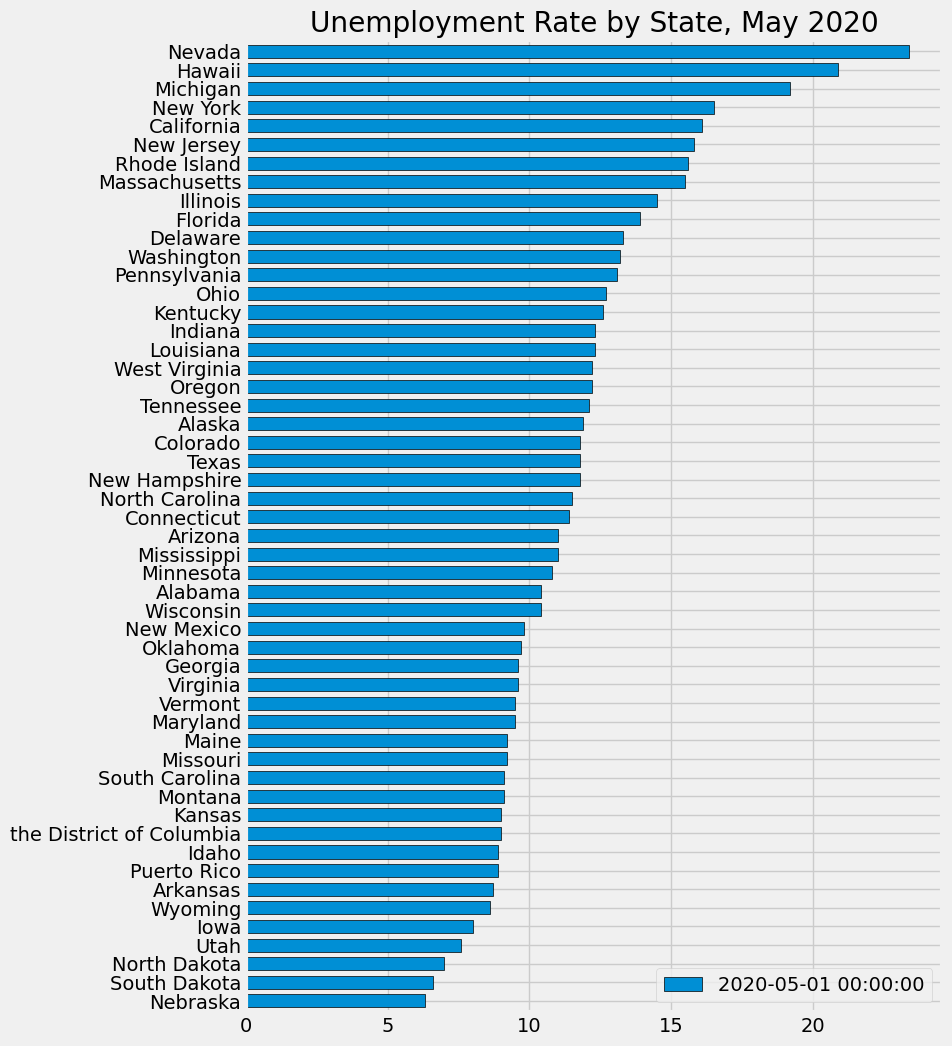

In [46]:
#Unemployment Rate
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2020')
ax.legend().remove()
ax.set_xlabel('% Unemployed')
plt.show()

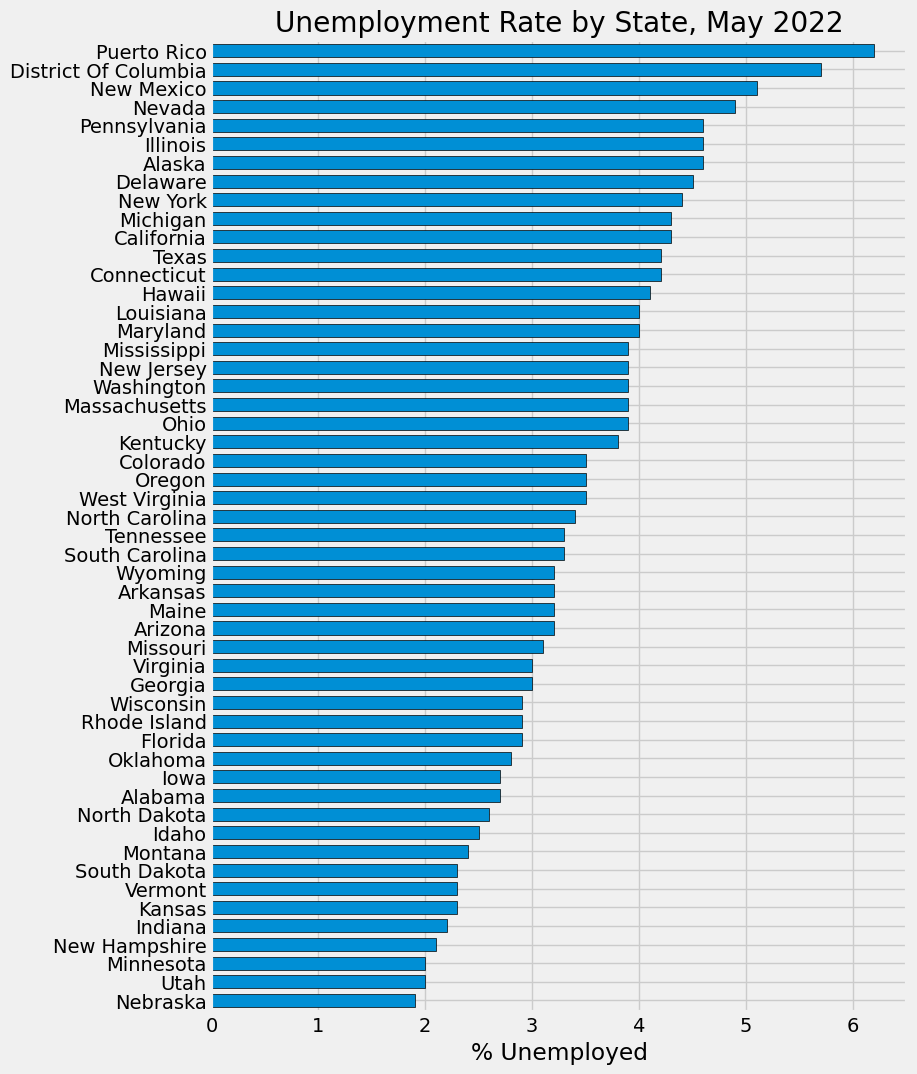

In [81]:
bx = uemp_states.loc[uemp_states.index == '2022-05-01'].T \
    .sort_values('2022-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black',
          title='Unemployment Rate by State, May 2022')
bx.legend().remove()
bx.set_xlabel('% Unemployed')
plt.show()

Text(0, 0.5, 'Change in Unemployment Rate')

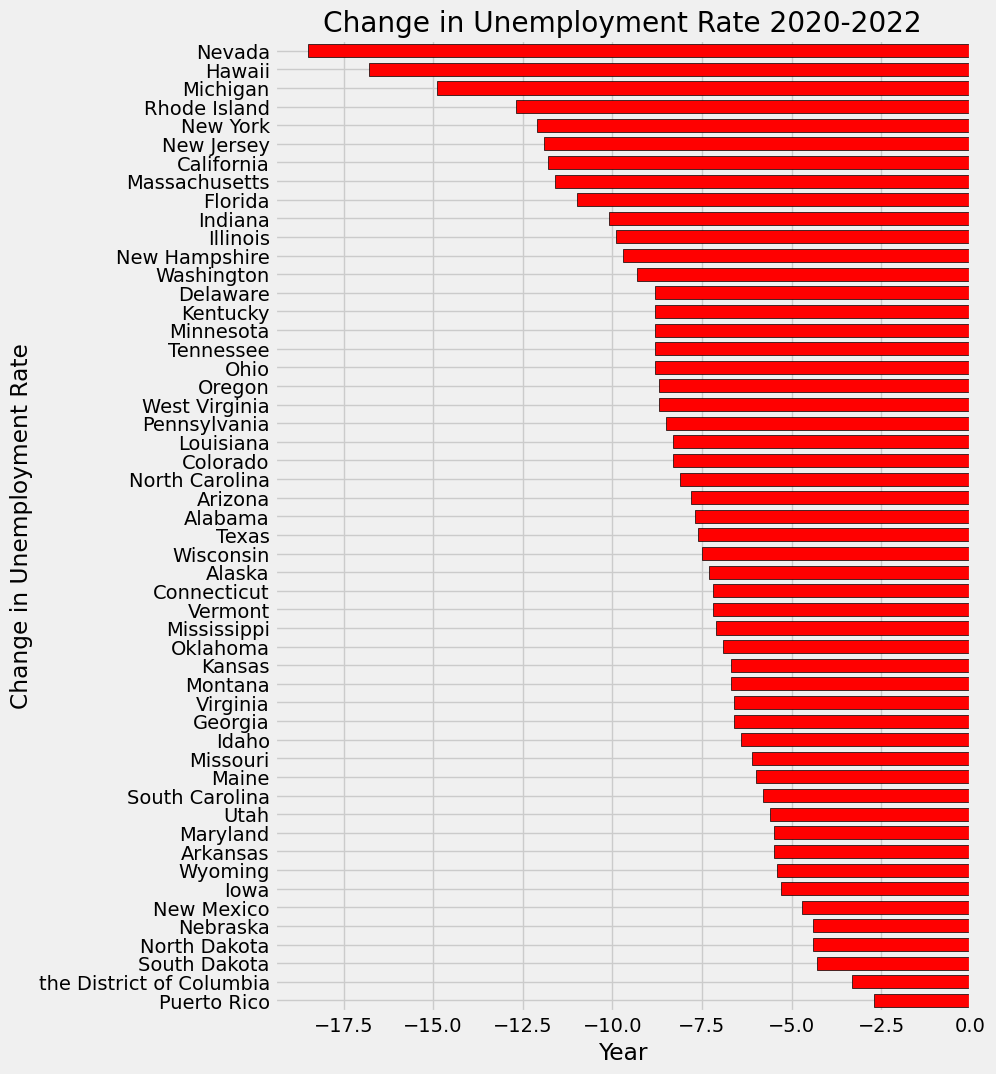

In [77]:
cx = uemp_states.loc[uemp_states.index == '2022-05-01'].T \
    .sort_values('2022-05-01')
cx['2020-05-01'] = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01')
cx['Change in the unemployment rate']=cx['2022-05-01']-cx['2020-05-01']

change = cx['Change in the unemployment rate'].sort_values(ascending=False)
#change.plot(kind='bar')
change.plot(kind='barh', figsize=(8, 12), width=0.7, edgecolor='black', color='red')
# Add a title and labels to the graph
plt.title('Change in Unemployment Rate 2020-2022')
plt.xlabel('Year')
plt.ylabel('Change in Unemployment Rate')

In [75]:
#Participation Rate
part_df = fred.search('participation rate state', filter=('frequency','Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [76]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [78]:
# Fix DC
uemp_states = uemp_states.rename(columns={'the District of Columbia':'District Of Columbia'})

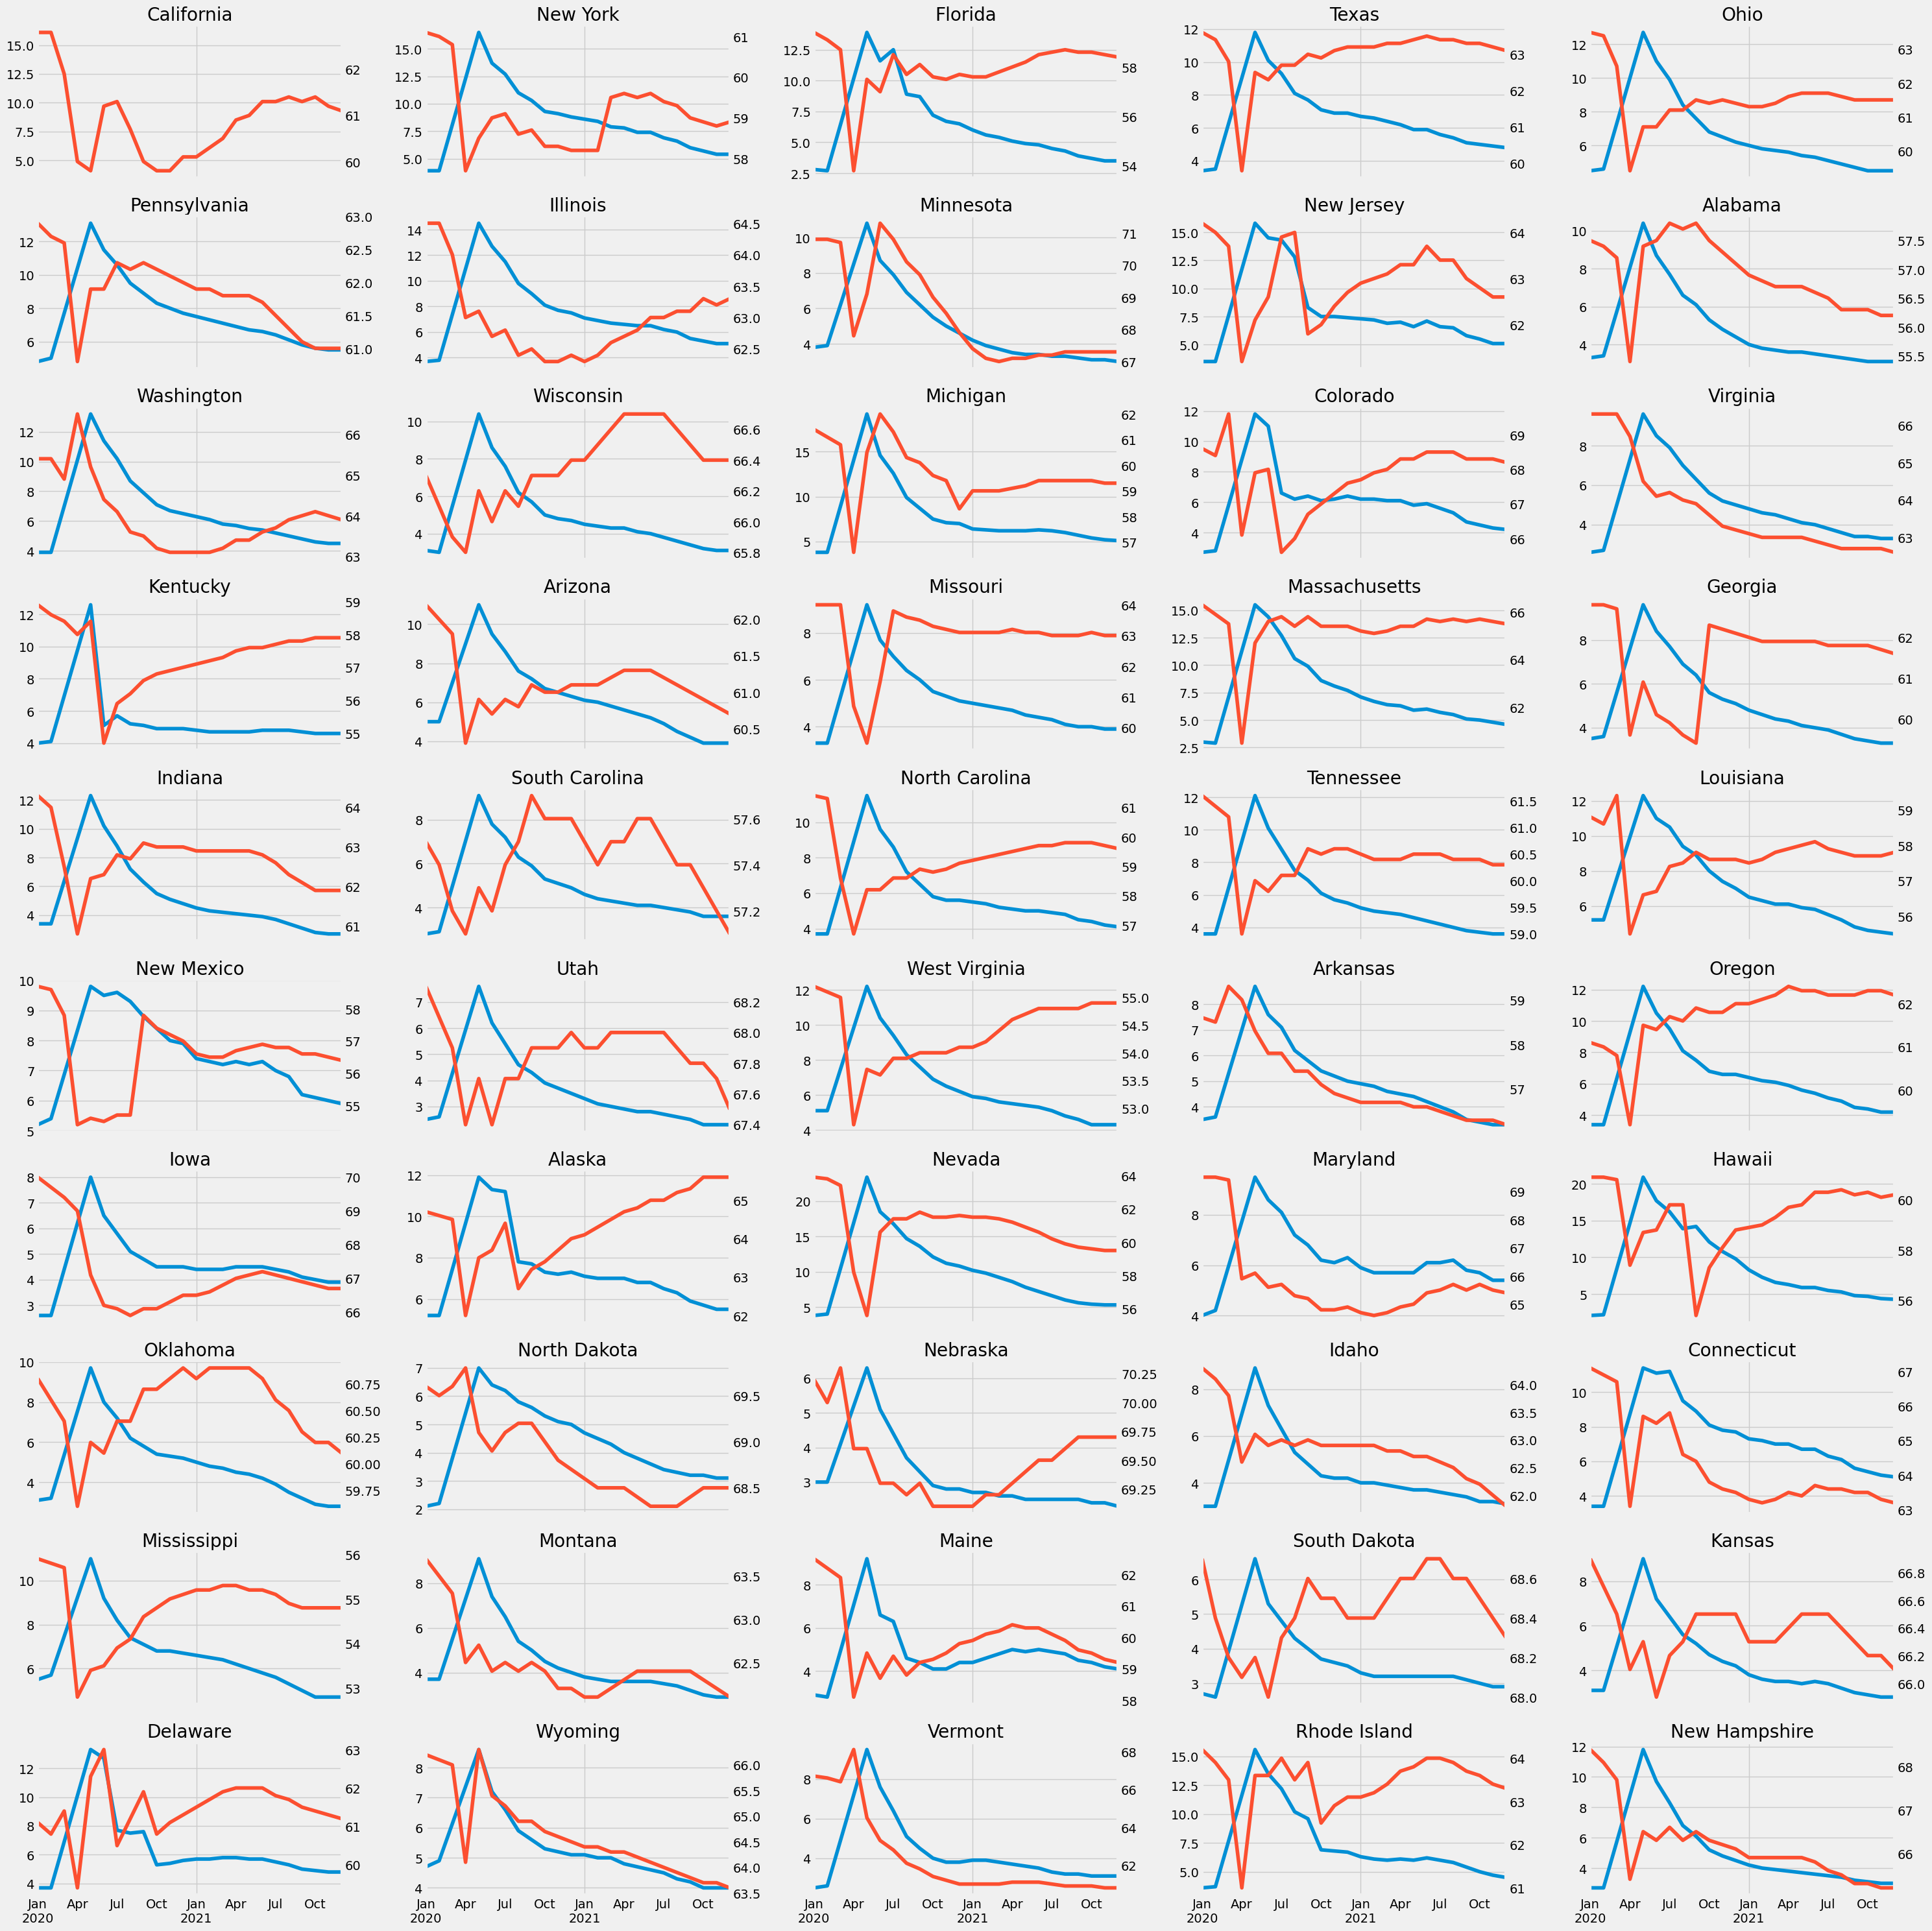

In [79]:
fig, axs = plt.subplots(10, 5, figsize=(30, 30), sharex=True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state in ["District Of Columbia","Puerto Rico"]:
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label='Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label='Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title(state)
    i += 1
plt.tight_layout()
plt.show()

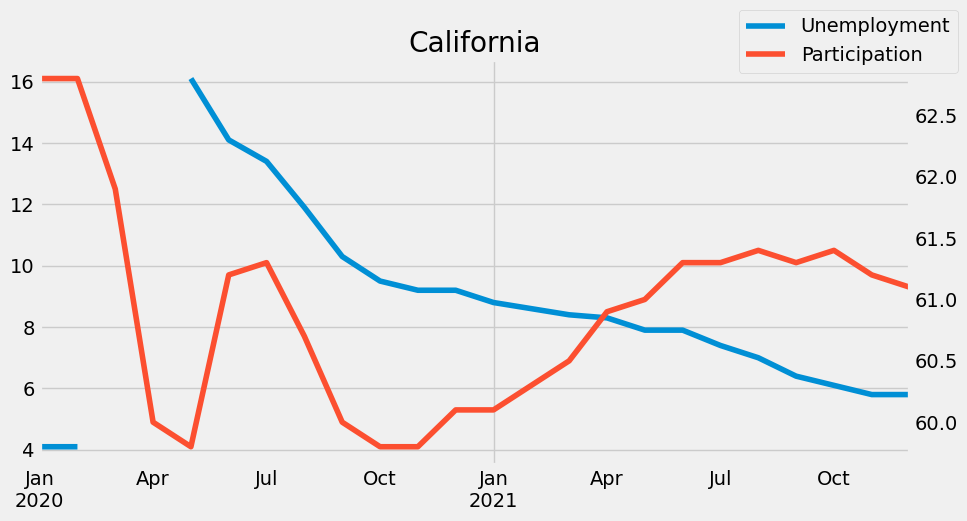

In [80]:
state = 'California'
fig, ax = plt.subplots(figsize=(10, 5), sharex=True)
ax2 = ax.twinx()
uemp_states2 = uemp_states.asfreq('MS')
l1 = uemp_states2.query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax, label='Unemployment')
l2 = part_states.dropna().query('index >= 2020 and index < 2022')[state] \
    .plot(ax=ax2, label='Participation', color=color_pal[1])
ax2.grid(False)
ax.set_title(state)
fig.legend(labels=['Unemployment','Participation'])
plt.show()